# Introduction

Notebook to aggregate the running of models in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
models_runner_4 = TC_BR_Runner()

lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df())
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[10,20,40], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (195, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_10_cosine_0.0,33.08,23.46,26.09,precision recall fscore ...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_10_cosine_0.1,33.08,23.46,26.09,precision recall fscore ...,0.1,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_10_cosine_0.2,33.08,23.46,26.09,precision recall fscore ...,0.2,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_10_cosine_0.3,33.08,23.46,26.09,precision recall fscore ...,0.3,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lsi,top_10_cosine_0.4,32.99,23.28,25.97,precision recall fscore ...,0.4,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


### Plots

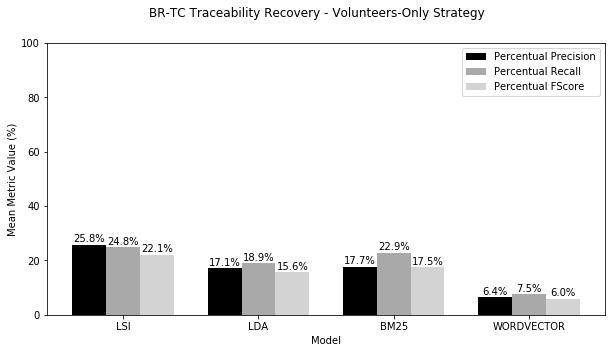

In [4]:
evaluator_4.plot_evaluations_3(evals_df_4, title='BR-TC Traceability Recovery - Volunteers-Only Strategy')

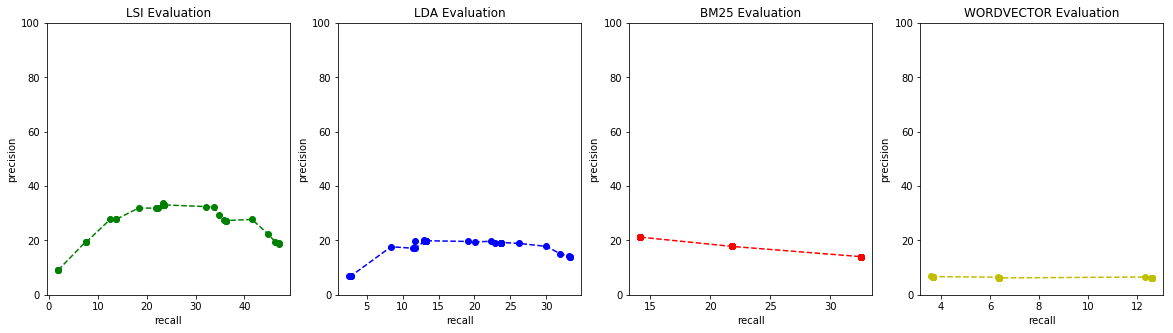

In [5]:
evaluator_4.plot_evaluations_4(evals_df_4)

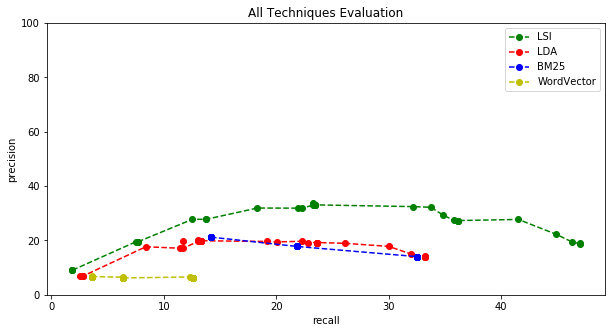

In [6]:
evaluator_4.plot_evaluations_5(evals_df_4)

### Delete Variables

## Union Strategy

In [ ]:
models_runner_1 = TC_BR_Runner()
lsi_model_1 = models_runner_1.run_lsi_model()
lda_model_1 = models_runner_1.run_lda_model()
bm25_model_1 = models_runner_1.run_bm25_model()
w2v_model_1 = models_runner_1.run_word2vec_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_volunteers_union_df())
evals_df_1 = evaluator_1.run_evaluator(models=[lsi_model_1, lda_model_1, bm25_model_1, w2v_model_1],
                                       top_values=[10,20,40], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-TC Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Intersec Strategy

In [ ]:
models_runner_2 = TC_BR_Runner()
lsi_model_2 = models_runner_2.run_lsi_model()
lda_model_2 = models_runner_2.run_lda_model()
bm25_model_2 = models_runner_2.run_bm25_model()
w2v_model_2 = models_runner_2.run_word2vec_model()

evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_volunteers_intersec_df())
evals_df_2 = evaluator_2.run_evaluator(models=[lsi_model_2, lda_model_2, bm25_model_2, w2v_model_2],
                                       top_values=[10,20,40], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

### Results

In [ ]:
evals_df_2.head()

### Plots

In [ ]:
evaluator_2.plot_evaluations_3(evals_df_2, title='BR-TC Traceability Recovery - Exp-Vol Intersec Strategy')

In [ ]:
evaluator_2.plot_evaluations_4(evals_df_2)

In [ ]:
evaluator_2.plot_evaluations_5(evals_df_2)

### Delete Variables

## Expert Only Strategy

In [ ]:
models_runner_3 = TC_BR_Runner()
lsi_model_3 = models_runner_3.run_lsi_model()
lda_model_3 = models_runner_3.run_lda_model()
bm25_model_3 = models_runner_3.run_bm25_model()
w2v_model_3 = models_runner_3.run_word2vec_model()

evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Tc_BR_Oracles.read_oracle_expert_df())
evals_df_3 = evaluator_3.run_evaluator(models=[lsi_model_3,lda_model_3,bm25_model_3,w2v_model_3],
                                       top_values=[10,20,40], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

### Results

In [ ]:
evals_df_3.head()

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3, title='BR-TC Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3)

### Delete Variables